# Data Exploration - For Interesting Features

To start I want to get a feel of the data that i'm working with.

In [76]:
import pandas as pd
from IPython.display import display

# Load the dataset
trainingSet = pd.read_csv("./data/X_train.csv")
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,68211,"Engineer, petroleum",23/04/1941,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0,2020-09-01,08:22:00
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,648,Community arts worker,21/09/1969,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0,2020-12-12,07:42:00
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,1595797,Land,17/10/1995,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0,2020-06-27,13:03:00
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,1293,Naval architect,11/09/1963,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0,2020-09-14,04:12:00
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,1725,Social researcher,05/12/1974,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0,2020-08-28,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,218,"Therapist, horticultural",16/08/1995,7e6011097067231cf9178de050f4dd4c,1387546102,46.332036,-114.660338,0.0,2020-12-20,13:28:00
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,172817,Advertising account planner,30/07/1982,5f5926277386db598df3be7a7d5d491d,1388022446,33.229608,-118.386434,0.0,2020-12-26,01:47:00
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,242,Tourism officer,18/07/1987,04b32f0a628784474a8f48f977605c4d,1379807336,39.316927,-97.617048,0.0,2020-09-21,23:48:00
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,1051,Chief Operating Officer,21/11/1976,cfe6c288ba518822c1b6822515a165e1,1372807037,37.084437,-78.715023,0.0,2020-07-02,23:17:00


lets start with counts of fraud and specific times and dates associated with them, I also want to see how many transactions we have for each person/cc_num(Unique customer identification number.)

In [77]:

# 1. Get the counts of fraudulent vs. non-fraudulent transactions
fraud_counts = trainingSet['is_fraud'].value_counts()
print("Fraud Counts:\n", fraud_counts)
print("")

# 2. Extract and analyze dates and times of fraudulent transactions
fraud_dates_times = trainingSet[trainingSet['is_fraud'] == 1][['trans_date', 'trans_time']]
print("Fraud Dates and Times:\n", fraud_dates_times)
print("")

# 3. Count the number of transactions for each person/cc_num
transactions_per_person = trainingSet['cc_num'].value_counts()
print("Transactions per person:\n", transactions_per_person)

Fraud Counts:
 is_fraud
0.0    484377
1.0      1877
Name: count, dtype: int64

Fraud Dates and Times:
         trans_date trans_time
343     2020-08-13   22:55:00
507     2020-07-10   23:09:00
1122    2020-12-12   23:39:00
1633    2020-08-25   13:29:00
3031    2020-11-10   23:20:00
...            ...        ...
484756  2020-10-04   22:58:00
484940  2020-11-14   05:34:00
485502  2020-09-27   22:49:00
485725  2020-11-14   22:07:00
486245  2020-08-16   03:47:00

[1877 rows x 2 columns]

Transactions per person:
 cc_num
6.011370e+15    1863
4.302480e+15    1519
2.131790e+14    1373
6.538440e+15    1303
4.586810e+15    1275
                ... 
3.540420e+15       8
5.038510e+11       8
4.883410e+12       8
4.352310e+18       5
4.295300e+12       5
Name: count, Length: 904, dtype: int64


Originally I was thinking maybe I could create trees for speicifc customers but I ran into some problems with that thinking:

- Scalability: It might not be scalable to build and maintain separate models for each customer, especially as the number of customers grows.

- Data Sparsity: Some customers might not have enough fraudulent transactions to train a robust model.

- Generalization: A model trained on one customer may not generalize well to others, and fraud patterns could be missed if they don't happen to be present in the training data for that specific customer.

Lets try and create visualizations for fraud to see if there are any specific trends I can see.

Let’s start by visualizing the distribution of fraudulent transactions over different time periods. We’ll look at the following:

- Fraud transactions by the hour of the day to see if there is a specific time when fraud is more prevalent.

- Fraud transactions by the day of the week to identify any patterns across the days.

- Distribution of transaction amounts for fraud to see if fraudulent transactions tend to be within a certain amount range.

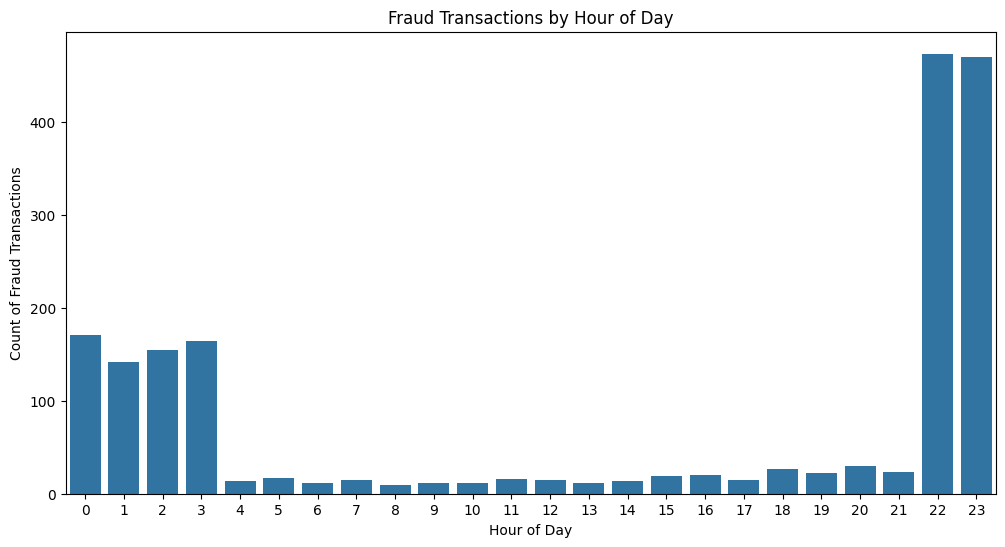

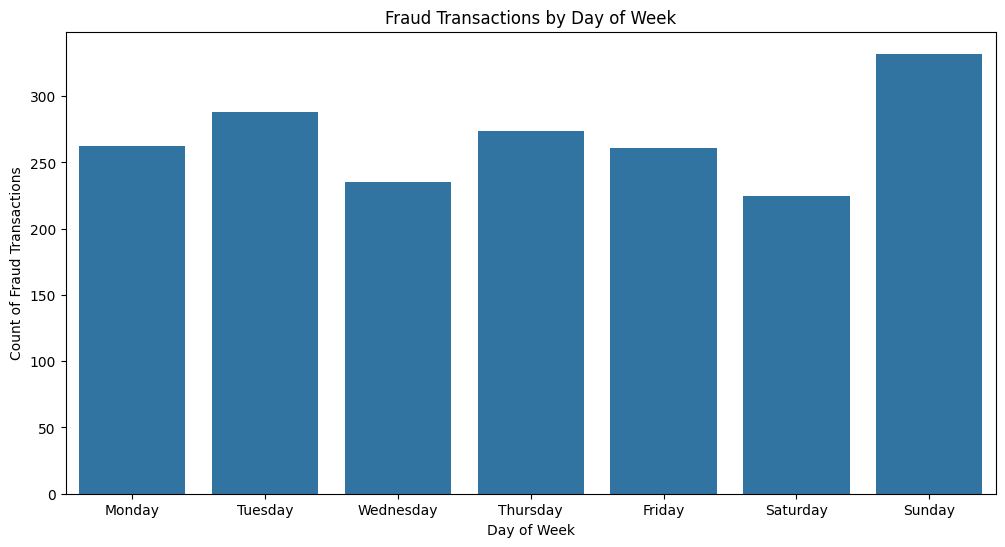

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your 'trans_date' and 'trans_time' are in the right datetime format
trainingSet['trans_date'] = pd.to_datetime(trainingSet['trans_date'])
trainingSet['trans_time'] = pd.to_timedelta(trainingSet['trans_time'].astype(str))

# Extract day of week and hour of day
trainingSet['day_of_week'] = trainingSet['trans_date'].dt.day_name()
trainingSet['hour_of_day'] = trainingSet['trans_time'].dt.components['hours']

# Now, let's plot the distribution of fraud transactions by hour of day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', data=trainingSet[trainingSet['is_fraud'] == 1])
plt.title('Fraud Transactions by Hour of Day')
plt.ylabel('Count of Fraud Transactions')
plt.xlabel('Hour of Day')
plt.show()

# And by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=trainingSet[trainingSet['is_fraud'] == 1], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fraud Transactions by Day of Week')
plt.ylabel('Count of Fraud Transactions')
plt.xlabel('Day of Week')
plt.show()


From the first plot, "Fraud Transactions by Hour of Day," it appears that there's a significant spike in fraudulent transactions at certain hours, especially late at night. This could be a useful feature for the model, as fraudulent activity may be more common when fewer legitimate transactions are typically taking place, and thus, it stands out more.

The second plot, "Fraud Transactions by Day of Week," shows variability across the days, with Sunday having notably higher counts. This might suggest that fraudsters prefer certain days, possibly due to lower vigilance or reduced transaction volumes, making fraud detection less likely. Let me also look at fraudulent transactions by category.

Since we know there are some definitely high risk times, lets make a feature for this:

In [79]:
# Define high-risk hours
high_risk_hours = set(range(21, 24)).union(set(range(0, 6)))

# Create the 'high_risk_time' feature based on 'hour_of_day'
trainingSet['high_risk_time'] = trainingSet['hour_of_day'].apply(lambda x: 1 if x in high_risk_hours else 0)


Thats interesting, but lets look at categories now.

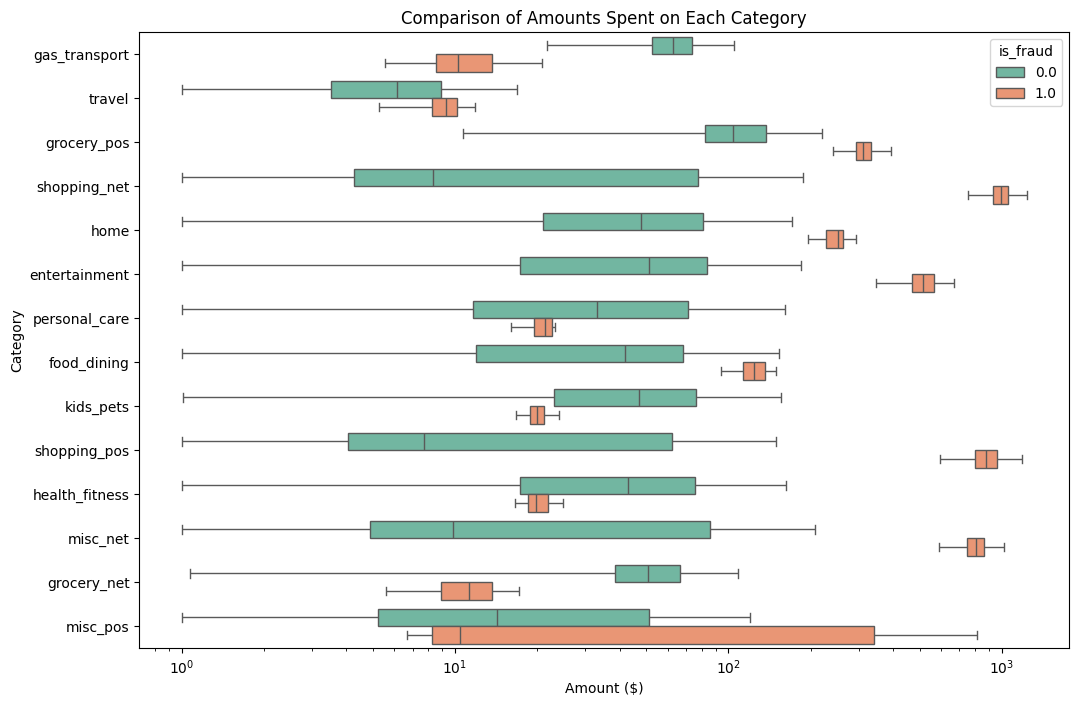

In [80]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='amt', y='category', hue='is_fraud', data=trainingSet, palette="Set2", showfliers=False)
plt.title('Comparison of Amounts Spent on Each Category')
plt.xlabel('Amount ($)')
plt.ylabel('Category')
plt.xscale('log')  # Use log scale if the distribution is highly skewed
plt.show()


So we can see that certain categories have transaction ranges that are clearly out of the norm. 

Lets create a feature that keeps track of this. First we'll first calculate the mean and standard deviation of the transaction amounts for each category. Then, we'll use these statistics to determine if a transaction is an outlier by checking if it falls outside 3 standard deviations from the mean.

We use 3 cause the fraudlent cases for the categories that are clear are quite outside the norm.

Im also creating a feature that is a binary for high risk categories, high_risk_categories = ['shopping_net', 'entertainment', 'shopping_pos', 'misc_net']

In [81]:
# Step 1: Calculate the mean and standard deviation for each category
category_stats = trainingSet.groupby('category')['amt'].agg(['mean', 'std']).reset_index()

# Rename the columns to be more descriptive
category_stats = category_stats.rename(columns={'mean': 'category_mean_amt', 'std': 'category_std_amt'})

# Step 2: Merge these statistics back into the original dataframe
trainingSet = trainingSet.merge(category_stats, how='left', on='category')

# Step 3: Create a binary feature that flags a transaction as an outlier
def is_outlier(row):
    if pd.isnull(row['category_std_amt']):  # If std is NaN, cannot determine if it's an outlier
        return 0
    lower_bound = row['category_mean_amt'] - 3 * row['category_std_amt']
    upper_bound = row['category_mean_amt'] + 3 * row['category_std_amt']
    return int(not lower_bound <= row['amt'] <= upper_bound)

trainingSet['category_outlier'] = trainingSet.apply(is_outlier, axis=1)

# There are also some high risk categories, so lets make a feature for that
# Define high-risk categories
high_risk_categories = ['shopping_net', 'entertainment', 'shopping_pos', 'misc_net']

# Create the 'high_risk_category' feature
trainingSet['high_risk_category'] = trainingSet['category'].isin(high_risk_categories).astype(int)


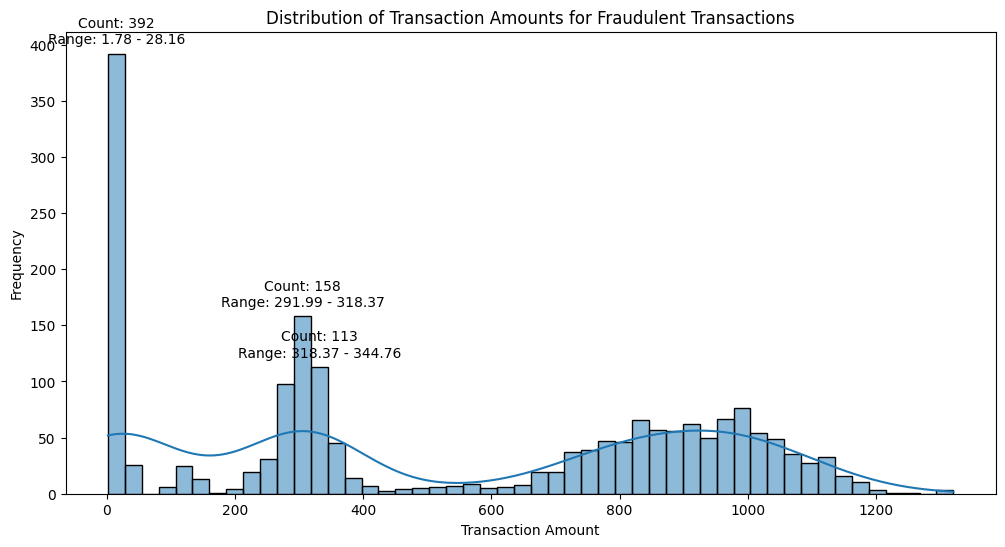

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fraud_amts = trainingSet[trainingSet['is_fraud'] == 1]['amt']

# Define the number of bins you want
num_bins = 50

# Create the histogram plot with seaborn
plt.figure(figsize=(12, 6))
hist_plot = sns.histplot(fraud_amts, bins=num_bins, kde=True)
plt.title('Distribution of Transaction Amounts for Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Calculate the counts and bin edges using numpy
counts, bin_edges = np.histogram(fraud_amts, bins=num_bins)

# Find the top 3 bins
top_bin_idxs = np.argsort(counts)[-3:]  # Indices of the top 3 bins

# Annotate the top 3 bins on the histogram
for idx in top_bin_idxs:
    # Get the bin range
    bin_range = f"{bin_edges[idx]:.2f} - {bin_edges[idx + 1]:.2f}"
    # Get the count for this bin
    bin_count = counts[idx]
    # Annotate on the plot
    plt.annotate(f'Count: {bin_count}\nRange: {bin_range}', xy=((bin_edges[idx] + bin_edges[idx + 1]) / 2, bin_count), 
                 xytext=(0,5), textcoords='offset points', ha='center', va='bottom')

plt.show()


The histogram created for the distribution of transaction amounts for fraudulent transactions reveals a few concentrated ranges with higher frequencies. These spikes could indicate common amounts for fraudulent transactions, which is valuable information.

I've also overlaid the counts and ranges on the histogram, providing a clearer view of where the highest frequencies of fraudulent transactions are occurring. This is a useful visualization technique because it quickly directs attention to areas of interest within the data.

Lets create a new feature that bins transaction amounts based on this:

In [83]:

# Define the bins as per the peaks observed in the histogram
bins = [-1, 30, 250, 350, 800, 1000, float('inf')]
bin_labels = ['1-30', '31-250', '251-350', '351-800', '800-1000', '1001+']

# Create the 'amount_bin' feature
trainingSet['amount_bin'] = pd.cut(trainingSet['amt'], bins=bins, labels=bin_labels)


Some more features I want to look into: 

- Customer Behavior Features:

    - Transaction Amount Deviation: How much each transaction deviates from the customer’s average transaction amount.


- Geographical Features:

    - Distance from Home: The distance of the transaction location from the customer’s home address (using Lat/Long for both customer and merchant).

To Start lets look at the distances of the customer from their merchants.

In [84]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two points 
    on the Earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of Earth in kilometers. Use 3956 for miles
    return c * r

# Now apply this function to the dataframe to create the distance feature
trainingSet['distance_from_home'] = trainingSet.apply(lambda row: haversine(row['long'], row['lat'], row['merch_long'], row['merch_lat']), axis=1)


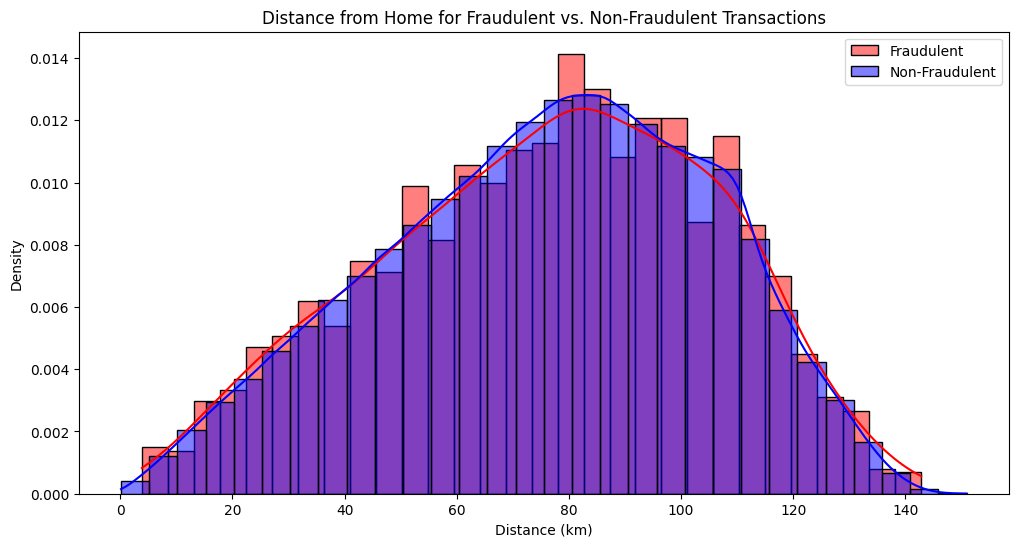

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Draw a histogram and KDE plot for fraudulent transactions
sns.histplot(trainingSet[trainingSet['is_fraud'] == 1]['distance_from_home'], color="red", label="Fraudulent", kde=True, stat="density", bins=30)

# Draw a histogram and KDE plot for non-fraudulent transactions
sns.histplot(trainingSet[trainingSet['is_fraud'] == 0]['distance_from_home'], color="blue", label="Non-Fraudulent", kde=True, stat="density", bins=30)

# Plot formatting
plt.legend()
plt.title('Distance from Home for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Distance (km)')
plt.ylabel('Density')
plt.show()


From the histogram , it seems that the distribution of distances for fraudulent and non-fraudulent transactions overlap significantly. This suggests that distance alone might not be a strong predictor of fraud in the dataset. However, it's also possible that distance could still be a contributing factor when combined with other features.

For instance, a transaction that's atypical for a customer's pattern, such as one that's far from home in combination with an unusual transaction amount, might be more suspicious than any of those factors considered in isolation. 

Lets try and combine this with mean transaction amounts to see if a significant variation in transaction amount, with a great distance leads to fraudulent transactions:

In [86]:
# Calculate the mean transaction amount and distance for each customer
customer_means = trainingSet.groupby('cc_num').agg({'amt': 'mean', 'distance_from_home': 'mean'}).rename(columns={'amt': 'mean_amt', 'distance_from_home': 'mean_distance'})

# Join the customer means back onto the transaction dataframe
trainingSet = trainingSet.join(customer_means, on='cc_num')

# Calculate deviations for amount and distance
trainingSet['amt_deviation'] = (trainingSet['amt'] - trainingSet['mean_amt']) / trainingSet['mean_amt']
trainingSet['distance_deviation'] = (trainingSet['distance_from_home'] - trainingSet['mean_distance']) / trainingSet['mean_distance']


In [87]:

# Flag transactions that are beyond a certain z-score for amount and distance
import scipy
from scipy.stats import zscore
trainingSet['amt_deviation_z'] = trainingSet.groupby('cc_num')['amt_deviation'].transform(zscore)
trainingSet['distance_deviation_z'] = trainingSet.groupby('cc_num')['distance_deviation'].transform(zscore)
trainingSet['atypical_txn'] = ((trainingSet['amt_deviation_z'] > 3) | (trainingSet['distance_deviation_z'] > 3)).astype(int)

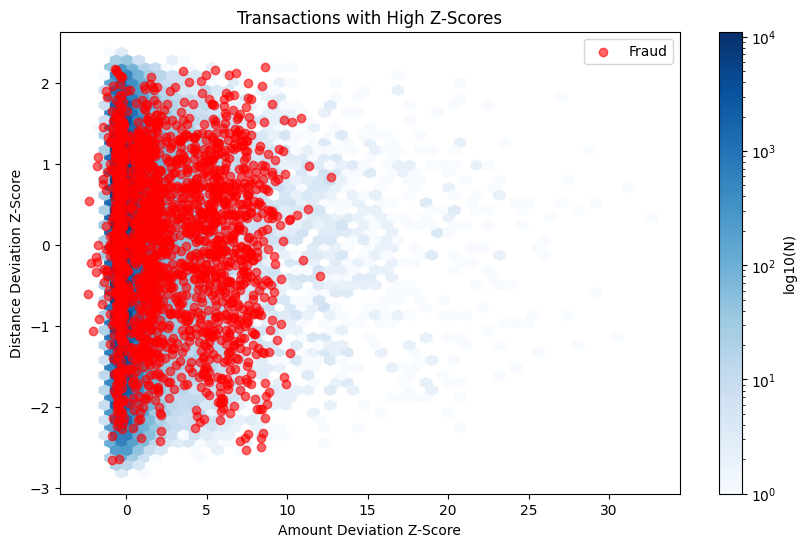

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(trainingSet['amt_deviation_z'], trainingSet['distance_deviation_z'], gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')

# Overlaying fraud points
fraudulent_transactions = trainingSet[trainingSet['is_fraud'] == 1]
plt.scatter(fraudulent_transactions['amt_deviation_z'], fraudulent_transactions['distance_deviation_z'], color='red', label='Fraud', alpha=0.6)

plt.xlabel('Amount Deviation Z-Score')
plt.ylabel('Distance Deviation Z-Score')
plt.title('Transactions with High Z-Scores')
plt.legend()
plt.show()


This doesn't inherently seem to tell us much other than that high average spending amounts seem to non-indicitive of fraudlent, as it mainly stays withint the 0 - 10 std range.

In [89]:
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,high_risk_category,amount_bin,distance_from_home,mean_amt,mean_distance,amt_deviation,distance_deviation,amt_deviation_z,distance_deviation_z,atypical_txn
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,0,31-250,50.737315,57.797517,80.336668,0.248843,-0.368441,0.215040,-0.969531,0
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,0,31-250,104.392466,63.399076,76.229090,-0.421758,0.369457,-0.288475,0.978368,0
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,0,1-30,100.963045,40.816940,80.750118,-0.957371,0.250315,-0.560623,0.681020,0
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,0,31-250,69.869598,59.066132,80.765233,1.386985,-0.134905,1.155566,-0.375547,0
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,1,1001+,92.423012,63.335838,78.770719,26.191398,0.173317,9.101567,0.456431,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,0,1-30,81.383486,70.500530,70.807763,-0.939008,0.149358,-0.972939,0.358629,0
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,0,31-250,103.949599,72.850973,76.856481,-0.521626,0.352516,-0.089752,0.928646,0
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,0,1-30,86.264441,64.853593,77.254689,-0.857834,0.116624,-0.213764,0.304841,0
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,0,1-30,86.961172,71.111471,76.401974,-0.867954,0.138206,-0.208586,0.366162,0


Lets try using a few models now to see how well the features are performing. We'll try a few and see how it goes. For clarity lets start a new notebook - Fitting the Features to a model.